In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rc('pdf', fonttype=42)

datadir = '../../../pmlb/datasets/'
frames = []
for f in glob(datadir+'/*/*.tsv.gz'):
    df = pd.read_csv(f,sep='\t') 
    group = 'feynman' if 'feynman' in f else 'strogatz' if 'strogatz' in f else 'black-box'
    frames.append(dict(
        name=f.split('/')[-1][:-7],
        nsamples = df.shape[0],
        nfeatures = df.shape[1],
        npoints = df.shape[0]*df.shape[1],
        Group=group
    ))
    
df = pd.DataFrame.from_records(frames)
df

,name,nsamples,nfeatures,npoints,Group
0,parity5,32,6,192,black-box
1,624_fri_c0_100_5,100,6,600,black-box
2,analcatdata_boxing2,132,4,528,black-box
3,654_fri_c0_500_10,500,11,5500,black-box
4,feynman_II_37_1,100000,4,400000,feynman
...,...,...,...,...,...
412,hepatitis,155,20,3100,black-box
413,665_sleuth_case2002,147,7,1029,black-box
414,feynman_I_43_43,100000,5,500000,feynman
415,feynman_test_1,100000,8,800000,feynman


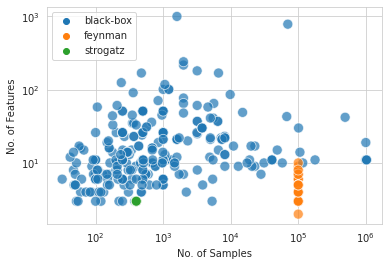

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.despine(left=True, bottom=True)
## PMLB dataset sizes
g = sns.scatterplot(
    data=df,
    x='nsamples',
    y='nfeatures',
    hue='Group',
    alpha=0.7,
    s=100, 
)
ax = plt.gca()
plt.legend(loc='upper left')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('No. of Samples')
plt.ylabel('No. of Features')
plt.savefig('figs/pmlb_size.pdf',dpi=400, bbox_inches='tight')